In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error



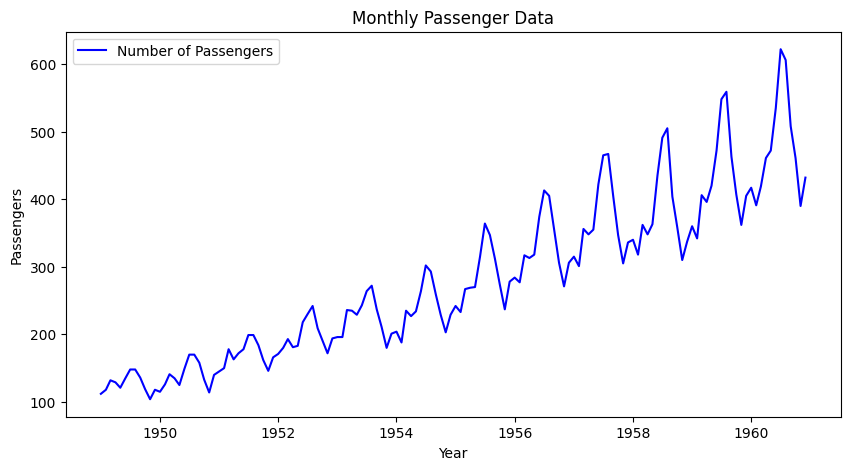

In [2]:

# Load dataset
df = pd.read_csv("/content/AirPassengers.csv", parse_dates=["Month"], index_col="Month")

# Visualize the dataset
plt.figure(figsize=(10, 5))
plt.plot(df, label="Number of Passengers", color="blue")
plt.title("Monthly Passenger Data")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()

In [3]:
# ADF Test for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is NOT stationary")


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Data is NOT stationary
ADF Statistic: -2.8292668241700047
p-value: 0.05421329028382478
Data is NOT stationary


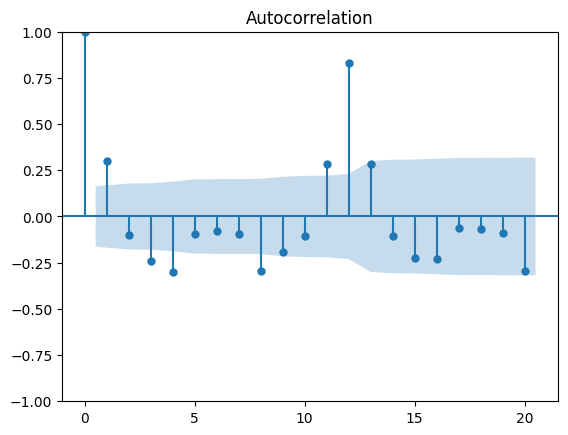

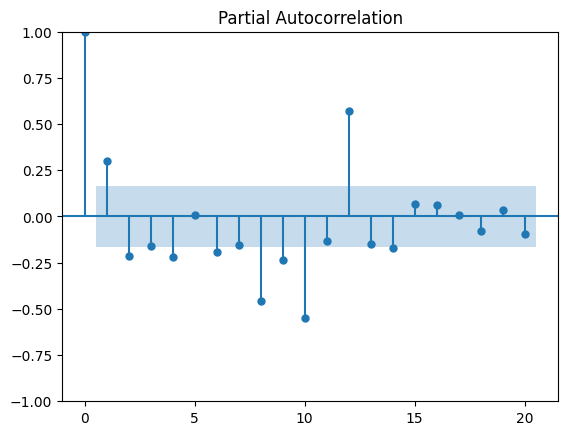

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Wed, 26 Mar 2025   AIC                           1353.347
Time:                        06:40:16   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.061      0.000       1.645       1.725
ar.L2         -0.9549      0.017    -55.420      0.000      -0.989      -0.921
ma.L1         -1.8432      0.124    -14.845      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [4]:
# Check stationarity
adf_test(df["#Passengers"])

# Apply Differencing (if needed)
df_diff = df.diff().dropna()  # First-order differencing
adf_test(df_diff["#Passengers"])  # Re-check stationarity

# Plot ACF & PACF to determine (p, d, q)
sm.graphics.tsa.plot_acf(df_diff, lags=20)  # Identifies q (MA component)
sm.graphics.tsa.plot_pacf(df_diff, lags=20) # Identifies p (AR component)
plt.show()

# Fit ARIMA Model (Tune (p, d, q) based on ACF/PACF)
model = ARIMA(df, order=(2, 1, 2))  # Example: p=2, d=1, q=2
model_fit = model.fit()

# Print summary
print(model_fit.summary())

# Make predictions
df["Forecast"] = model_fit.predict(start=len(df)-12, end=len(df)-1, dynamic=False)


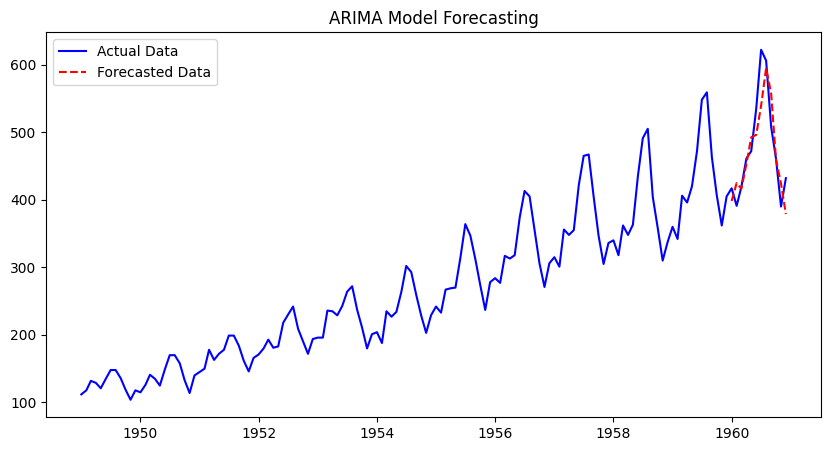

In [5]:
# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(df["#Passengers"], label="Actual Data", color="blue")
plt.plot(df["Forecast"], label="Forecasted Data", linestyle="dashed", color="red")
plt.legend()
plt.title("ARIMA Model Forecasting")
plt.show()


In [6]:
# Forecast Future Values
future_steps = 12  # Predict next 12 months
forecast = model_fit.forecast(steps=future_steps)

# Print forecast values
print("Future Forecast:")
print(forecast)

Future Forecast:
1961-01-01    439.854513
1961-02-01    465.296054
1961-03-01    500.665761
1961-04-01    535.971659
1961-05-01    561.690109
1961-06-01    571.314405
1961-07-01    562.974263
1961-08-01    539.731146
1961-09-01    508.529538
1961-10-01    478.147818
1961-11-01    456.746809
1961-12-01    449.695642
Freq: MS, Name: predicted_mean, dtype: float64
